<a href="https://colab.research.google.com/github/Calebcarp/CS290/blob/main/gmmVSkmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [53]:
iris = load_iris()

In [54]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X = df.values
true_labels = iris.target

In [55]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [56]:
def kmeans(X, k, max_iters=100, initial_method='random', initial_centroids=None):
    if initial_method == 'random':
        centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    centroids_history = []
    for i in range(max_iters):
        labels = np.array([np.argmin([euclidean_distance(point, c) for c in centroids]) for point in X])
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        centroids_history.append(new_centroids)
        if np.all(centroids == new_centroids):
            print(f"Converged at iteration {i + 1}")
            break
        centroids = new_centroids
    return centroids, labels, centroids_history

In [57]:
def fit_gmm(X, k):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    labels = gmm.predict(X)
    return gmm.means_, labels

In [58]:
def calculate_accuracy(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    accuracy = np.sum(np.amax(cm, axis=0)) / np.sum(cm)
    return accuracy

In [64]:
centroids_kmeans, labels_kmeans, _ = kmeans(X, k=3)

Converged at iteration 4


In [65]:
centroids_gmm, labels_gmm = fit_gmm(X, k=3)

In [66]:
accuracy_kmeans = calculate_accuracy(true_labels, labels_kmeans)
accuracy_gmm = calculate_accuracy(true_labels, labels_gmm)

In [67]:
print(f"Accuracy for K-Means: {accuracy_kmeans:.4f}")
print(f"Accuracy for GMM: {accuracy_gmm:.4f}")

Accuracy for K-Means: 0.6667
Accuracy for GMM: 0.9667


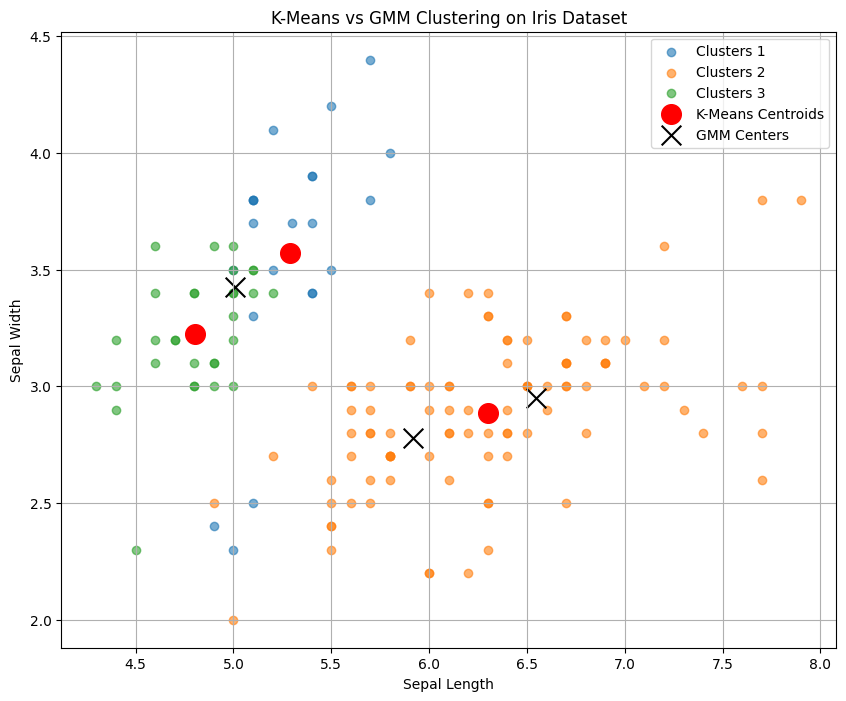

In [68]:
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.scatter(X[labels_kmeans == i, 0], X[labels_kmeans == i, 1], label=f'Clusters {i+1}', alpha=0.6)

plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='red', marker='o', s=200, label='K-Means Centroids')
plt.scatter(centroids_gmm[:, 0], centroids_gmm[:, 1], c='black', marker='x', s=200, label='GMM Centers')
plt.title('K-Means vs GMM Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.grid(True)
plt.show()